In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Census & gmaps API Keys
from config import (api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

## Collecting Data from Census (2013 - 2018): CA, CO, Fl, ID, OR, TX

In [34]:
# Run Census Search to retrieve data on all states

years=[2013,2014,2015,2016,2017,2018]

# Names for your columns

#Jenifer
column1 = "Population"
column2 = "Per Capita Income"
column3 = "Poverty Count"
#Natalia
column4 = "Rent(%)" #Median Rent as a Percentage of Houshold Income
column5 = "House with mortgage(%)" #Median Owner Cost for House WITH Mortgage as a Percentage of Houshold Income 
column6 = "House without mortgage(%)" #Median Owner Cost for House WITHOUT Mortgage as a Percentage of Houshold Income 
#Hossein
column7 = "Mean of Trans by Age"
column8 = "Travel Time to Work"
#Daniel (Race part)
column9 = "Race Total"
column10 = "White alone"
column11 = "Block or African American alone"
column12 = "American Indian and Alaska Native Alone"
column13 = "Asian Alone"
column14 = "Unemployement count"

median_rent_pd = pd.DataFrame()
all_years_df = pd.DataFrame()

states_list=[]
years_list=[]

column1_data =[]
column2_data =[]
column3_data =[]
column4_data =[]
column5_data =[]
column6_data =[]
column7_data =[]
column8_data =[]
column9_data =[]
column10_data =[]
column11_data =[]
column12_data =[]
column13_data =[]
column14_data =[]

state_number = []


for y in years:
    
    c = Census(api_key, year=y)
    
    #Give Names for your Groups
    median_rent_data = c.acs5.get(("NAME", "B01003_001E","B19301_001E", "B17001_002E", 
                                   "B25071_001E","B25092_002E", "B25092_003E",
                                  "B08101_001E", "B08303_001E",
                                  "B02001_001E", "B02001_002E", "B02001_003E", "B02001_004E","B02001_005E","B23025_005E"), 
                         {'for': 'state: 06, 08, 12, 16, 41, 48'})
    
        #To assing yeach value with specific year


    # Sorting to put states in the same order states in the table
    median_rent_pd = pd.DataFrame(median_rent_data).sort_values("NAME",ascending=True)
    median_rent_pd = median_rent_pd.reset_index()
    #print(median_rent_pd)
    
    year_column=[]
    for i in range(len(median_rent_pd["state"])):
        year_column.append(y)
    #print(year_column)
    
    #Adding all data into lists
    state_number.extend(median_rent_pd["state"].tolist())
    states_list.extend(median_rent_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(median_rent_pd["B01003_001E"].tolist())
    column2_data.extend(median_rent_pd["B19301_001E"].tolist())
    column3_data.extend(median_rent_pd["B17001_002E"].tolist())
    column4_data.extend(median_rent_pd["B25071_001E"].tolist())
    column5_data.extend(median_rent_pd["B25092_002E"].tolist())
    column6_data.extend(median_rent_pd["B25092_003E"].tolist())
    column7_data.extend(median_rent_pd["B08101_001E"].tolist())
    column8_data.extend(median_rent_pd["B08303_001E"].tolist())
    column9_data.extend(median_rent_pd["B02001_001E"].tolist())
    column10_data.extend(median_rent_pd["B02001_002E"].tolist())
    column11_data.extend(median_rent_pd["B02001_003E"].tolist())
    column12_data.extend(median_rent_pd["B02001_004E"].tolist())
    column13_data.extend(median_rent_pd["B02001_005E"].tolist())
    column14_data.extend(median_rent_pd["B23025_005E"].tolist())    
    
    
#print(years_list)
#print(states_list)

all_years_df["Year"] = years_list
all_years_df["State Name"] = states_list
all_years_df["State Number"] = state_number
all_years_df[column1] = column1_data
all_years_df[column2] = column2_data
all_years_df[column3] = column3_data
all_years_df[column4] = column4_data
all_years_df[column5] = column5_data
all_years_df[column6] = column6_data
all_years_df[column7] = column7_data
all_years_df[column8] = column8_data

all_years_df[column9] = column9_data
all_years_df[column10] = column10_data
all_years_df[column11] = column11_data
all_years_df[column12] = column12_data
all_years_df[column13] = column13_data
all_years_df[column14] = column14_data

all_years_df.head()
#print(states_list)

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


In [35]:
# Add a Poverty Rate Column
all_years_df["Poverty Rate"] = 100 * all_years_df["Poverty Count"].astype(int)/all_years_df["Population"].astype(int)
all_years_df.head()

,Year,State Name,State Number,Population,Per Capita Income,Poverty Count,Rent(%),House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count,Poverty Rate
0,2013,California,06,37659181.0,29527.0,5885417.0,33.7,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0,15.628107
1,2013,Colorado,08,5119329.0,31109.0,660874.0,30.9,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0,12.909387
2,2013,Florida,12,19091156.0,26236.0,3052807.0,34.9,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0,15.990687
3,2013,Idaho,16,1583364.0,22568.0,240298.0,29.8,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0,15.176422
4,2013,Oregon,41,3868721.0,26809.0,614778.0,32.2,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0,15.890988


## Migration Data (2013 - 2018): CA, CO, Fl, ID, OR, TX

In [36]:
# Adding Migration Data per state for 2013-2018
# Migration in US
# Study data files
migration_file_path = "Data/Total_Migration_2013-2018_CSV.csv"

# Reading the migration data from CSV file
migration_all_states_df = pd.read_csv(migration_file_path)

# Combine the two dataframes into a single dataset
merge_data_df = pd.merge(all_years_df,migration_all_states_df, on=["Year","State Name"])

#Column rearrangment
all_census_data = merge_data_df[['Year','State Name','State Number','Population','Move In','Move Out','Delta','Per Capita Income','Poverty Count','Poverty Rate','Rent(%)',
 'House with mortgage(%)','House without mortgage(%)','Mean of Trans by Age','Travel Time to Work','Race Total','White alone',
 'Block or African American alone','American Indian and Alaska Native Alone','Asian Alone','Unemployement count']]
all_census_data.head()

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Poverty Rate,...,House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,15.628107,...,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
1,2013,Colorado,08,5119329.0,206543.0,166348.0,40195.0,31109.0,660874.0,12.909387,...,24.0,10.2,2494794.0,2331060.0,5119329.0,4301096.0,203755.0,49177.0,141719.0,231741.0
2,2013,Florida,12,19091156.0,529406.0,423995.0,105411.0,26236.0,3052807.0,15.990687,...,28.0,13.6,8094220.0,7706393.0,19091156.0,14568521.0,3056152.0,58390.0,475905.0,1096028.0
3,2013,Idaho,16,1583364.0,61592.0,63788.0,-2196.0,22568.0,240298.0,15.176422,...,24.1,10.2,684393.0,645127.0,1583364.0,1455692.0,8957.0,19984.0,20141.0,67189.0
4,2013,Oregon,41,3868721.0,143841.0,111680.0,32161.0,26809.0,614778.0,15.890988,...,26.2,12.8,1700451.0,1591348.0,3868721.0,3297149.0,70328.0,47411.0,147986.0,221191.0


## Writing the final DataFlame into CSV file. Path "Data/all_census_data.csv"

In [37]:
## Writing the final DataFlame into CSV file
all_census_data.to_csv("Data/all_census_data.csv",index=False)

# Analysis

## Part-I: Races in CA (Daniel)

In [40]:
# Selecting data by states
cal_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "California"]
texas_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Texas"]
colorado_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Colorado"]
florida_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Florida"]
idaho_all_years  = merge_data_df.loc[merge_data_df["State Name"]== "Idaho"]
oregon_all_years   = merge_data_df.loc[merge_data_df["State Name"]== "Oregon"]

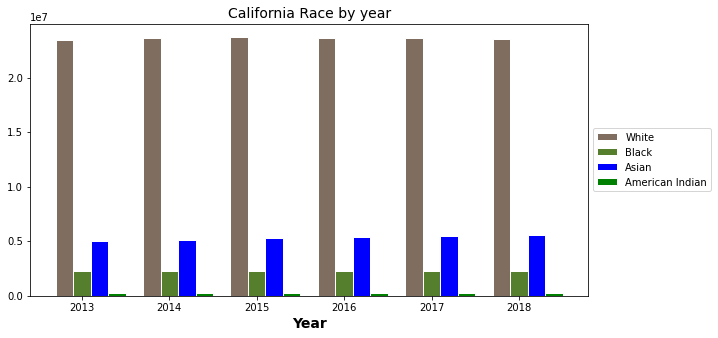

In [96]:
#Bar Chart for race info in California - Dan

plt.figure(figsize=(10,5))
# set width of bar
barWidth = 0.2

# set height of bar
bars1 = cal_all_years["White alone"]
bars2 = cal_all_years["Block or African American alone"]
bars3 = cal_all_years["Asian Alone"]
bars4 = cal_all_years["American Indian and Alaska Native Alone"]

# Set position of bar on X axis

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='White')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Black')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='Asian')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='American Indian')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold',fontsize=14)
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
plt.title("California Race by year",fontsize=14)
# Create legend & Show graphic


# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

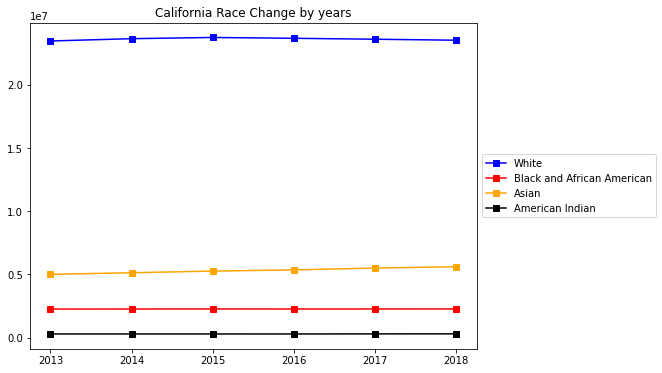

In [44]:
#California Race change- Dan
plt.figure(figsize=(8,6))
x_axis = cal_all_years["Year"]
y_axis_white = cal_all_years["White alone"]
y_axis_black = cal_all_years["Block or African American alone"]
y_axis_asian = cal_all_years["Asian Alone"]
y_axis_indian = cal_all_years["American Indian and Alaska Native Alone"]


White, = plt.plot(x_axis, y_axis_white, marker="s",color="blue", label="White")
Black, = plt.plot(x_axis, y_axis_black, marker="s",color="red", label="Black and African American")
Asian, = plt.plot(x_axis, y_axis_asian, marker="s",color="orange", label="Asian")
Indian, = plt.plot(x_axis, y_axis_indian, marker="s",color="black", label="American Indian")


# Set our legend to where the chart thinks is best
plt.title("California Race Change by years")
plt.legend(handles=[White, Black, Asian, Indian], loc="center left", bbox_to_anchor=(1, 0.5))


The P Value is :4.317193009555908e-05


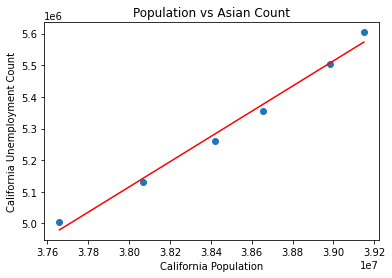

In [105]:
#Population vs Asian

x_values = cal_all_years["Population"]
y_values = cal_all_years['Asian Alone']

(asian_slope, asian_intercept, asian_rvalue, asian_pvalue, asian_stderr) = linregress(x_values, y_values)
asian_regress_values = x_values * asian_slope + asian_intercept
asian_line_eq = "y = " + str(round(asian_slope,2)) + "x + " + str(round(asian_intercept,2))

plt.plot(x_values,asian_regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Asian Count")
print(f"The P Value is :{asian_pvalue}")
plt.savefig('Images/population_unemployment_scatter_Asian.png', dpi=300)
plt.show()

The P Value is :0.7470916360748657


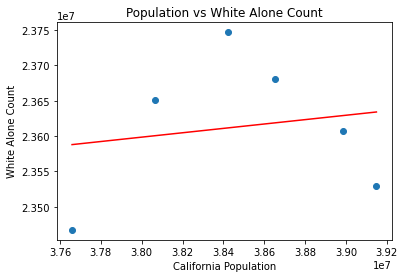

In [106]:
#Population vs White

x_values = cal_all_years["Population"]
y_values = cal_all_years['White alone']

(white_slope, white_intercept, white_rvalue, white_pvalue, white_stderr) = linregress(x_values, y_values)
white_regress_values = x_values * white_slope + white_intercept
white_line_eq = "y = " + str(round(white_slope,2)) + "x + " + str(round(white_intercept,2))

plt.plot(x_values,white_regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("White Alone Count")
plt.title("Population vs White Alone Count")
print(f"The P Value is :{white_pvalue}")
plt.savefig('Images/population_unemployment_scatter_White.png', dpi=300)
plt.show()

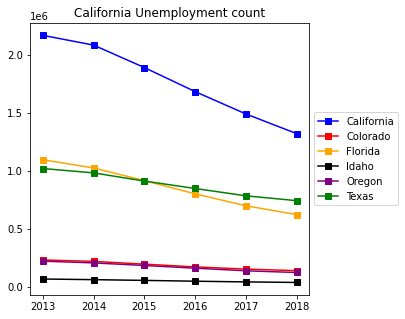

In [108]:
#Unemmployment count all states - Dan

plt.figure(figsize=(5,5))
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Unemployement count"]
y_axis_co = colorado_all_years["Unemployement count"]
y_axis_fl = florida_all_years["Unemployement count"]
y_axis_id = idaho_all_years["Unemployement count"]
y_axis_or = oregon_all_years["Unemployement count"]
y_axis_tx = texas_all_years["Unemployement count"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")
plt.title("California Unemployment count")
# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig('Images/California_Unemployment_count.png', dpi=300)
plt.show()

The P Value is :0.0006331670738286369


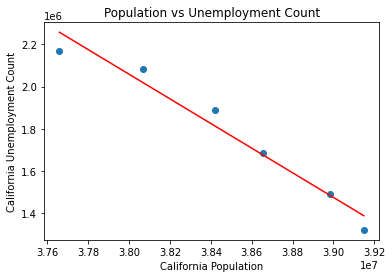

In [109]:
#Population vs Unemployment Count
# plt.figure(figsize=(6,8))
x_values = cal_all_years["Population"]
y_values = cal_all_years['Unemployement count']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Population")
plt.ylabel("California Unemployment Count")
plt.title("Population vs Unemployment Count")
print(f"The P Value is :{pvalue}")
plt.savefig('Images/Population_vs_Unemployment_Count.png', dpi=300)
plt.show()

The Regress is :y = -7.58x + 6608749.38
The P Value is :0.0025258214266583585


<function matplotlib.pyplot.show(close=None, block=None)>

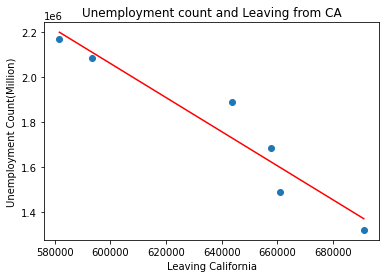

In [110]:
#relationship between Unemloyment and leaving CA - Dan

labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Into_CA = [485477, 513968, 514477, 514758, 523131, 501023]
Leaving_CA =[581679.0, 593308.0, 643710.0, 657690.0, 661026.0, 691145.0]
leaving_ca_df = pd.DataFrame(Leaving_CA) 


x_values = Leaving_CA
y_values = cal_all_years["Unemployement count"]

plt.scatter(Leaving_CA, y_values)

# Set the label and width for the bar chart
width = 0.35

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.array(x_values) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.plot(x_values,regress_values,"red")
plt.ylabel("Unemployment Count(Million)")
plt.xlabel("Leaving California")
plt.title("Unemployment count and Leaving from CA")

print(f"The Regress is :{line_eq}")
print(f"The P Value is :{pvalue}")

plt.savefig('Images/Unemployment_count_and_Leaving_from_CA.png', dpi=300)

plt.show


The P Value is :7.975854605777744e-05


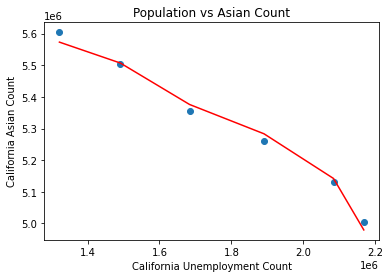

In [112]:
#Population vs Asian

x_values = cal_all_years["Unemployement count"]
y_values = cal_all_years['Asian Alone']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,asian_regress_values,"red")
plt.scatter(x_values, y_values)
plt.xlabel("California Unemployment Count")
plt.ylabel("California Asian Count")
plt.title("Population vs Asian Count")
print(f"The P Value is :{pvalue}")
plt.savefig('Images/Population_vs_Asian_Count.png', dpi=300)
plt.show()

## Part-II: Travel Time (Hossein)

## Part-III:  Household Income and Taxes (Sara)

### Household Income Data

In [81]:
# California Household Income Data Frame from Data collected from Census Data
income_df = pd.DataFrame({
    "Year":["2013", "2014", "2015", "2016", "2017", "2018"],
    "California Median Income":[66159, 66947, 69603, 72167, 74888, 76641],
    "US Median Income":[57437, 58001, 60187, 61383, 62927, 63059],
    "Difference": [8722, 8946, 9416, 10784, 11961, 13582]})

# To format the columns
income_df["California Median Income"] = income_df["California Median Income"].map("{:,}".format)
income_df["US Median Income"] = income_df["US Median Income"].map("{:,}".format)
income_df["Difference"] = income_df["Difference"].map("{:,}".format)
income_df

,Year,California Median Income,US Median Income,Difference
0,2013,"66,159","57,437","8,722"
1,2014,"66,947","58,001","8,946"
2,2015,"69,603","60,187","9,416"
3,2016,"72,167","61,383","10,784"
4,2017,"74,888","62,927","11,961"
5,2018,"76,641","63,059","13,582"


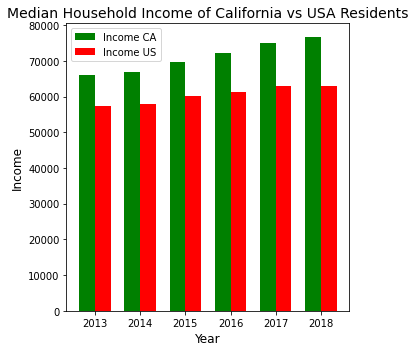

In [82]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_USA =[57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.35

# Create bar graph 
fig, ax = plt.subplots(figsize=(5,5))
fig1 = ax.bar(x_axis - width/2, Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + width/2, Income_USA, width, color = "red", label = "Income US")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.set_title("Median Household Income of California vs USA Residents",fontsize=14)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])
ax.legend()
fig.tight_layout()
plt.savefig("Images/HHincomeCA_USA.png")
plt.show()

California households make more yearly income than the US national average.

In [83]:
# CA,CO,FL,ID,OR,TX Household Income Data Frame from Data collected from Census Data
income_df = pd.DataFrame({
    "Year":["2013", "2014", "2015", "2016", "2017", "2018"],
    "CA":[66159, 66947, 69603, 72167, 74888, 76641],
    "CO":[58823, 61303, 63909, 65685, 70676, 71953],
    "FL":[47886, 46140, 48825, 51176, 53945, 55462],
    "ID":[46873, 47861, 48275, 51807, 53392, 55583],
    "OR":[50251,51075, 54148, 57532, 61369, 63426],
    "TX":[51704, 53035, 55653, 56565, 60416, 60629],
    "USA":[57437, 58001, 60187, 61383, 62927, 63059],})

# To format the columns
income_df["CA"] = income_df["CA"].map("{:,}".format)
income_df["CO"] = income_df["CO"].map("{:,}".format)
income_df["FL"] = income_df["FL"].map("{:,}".format)
income_df["ID"] = income_df["ID"].map("{:,}".format)
income_df["OR"] = income_df["OR"].map("{:,}".format)
income_df["TX"] = income_df["TX"].map("{:,}".format)
income_df["USA"] = income_df["USA"].map("{:,}".format)
income_df

,Year,CA,CO,FL,ID,OR,TX,USA
0,2013,"66,159","58,823","47,886","46,873","50,251","51,704","57,437"
1,2014,"66,947","61,303","46,140","47,861","51,075","53,035","58,001"
2,2015,"69,603","63,909","48,825","48,275","54,148","55,653","60,187"
3,2016,"72,167","65,685","51,176","51,807","57,532","56,565","61,383"
4,2017,"74,888","70,676","53,945","53,392","61,369","60,416","62,927"
5,2018,"76,641","71,953","55,462","55,583","63,426","60,629","63,059"


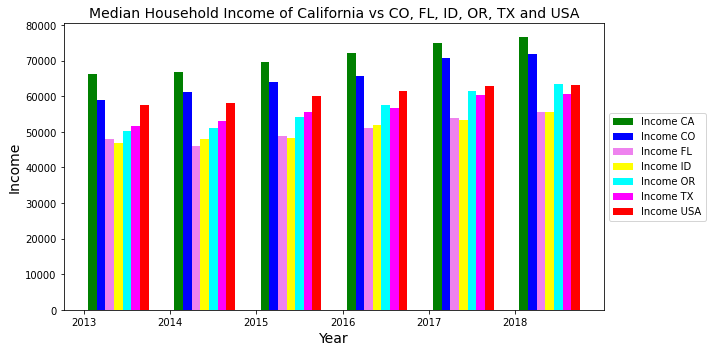

In [84]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_CO = [58823, 61303, 63909, 65685, 70676, 71953]
Income_FL = [47886, 46140, 48825, 51176, 53945, 55462]
Income_ID = [46873, 47861, 48275, 51807, 53392, 55583]
Income_OR = [50251,51075, 54148, 57532, 61369, 63426]
Income_TX = [51704, 53035, 55653, 56565, 60416, 60629]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.10

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_CO, width, color = "blue", label = "Income CO")
fig3 = ax.bar(x_axis + (3 * width), Income_FL, width, color = "violet", label = "Income FL")
fig4 = ax.bar(x_axis + (4 * width), Income_ID, width, color = "yellow", label = "Income ID")
fig5 = ax.bar(x_axis + (5 * width), Income_OR, width, color = "cyan", label = "Income OR")
fig6 = ax.bar(x_axis + (6 * width), Income_TX, width, color = "magenta", label = "Income TX")
fig7 = ax.bar(x_axis + (7 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=14)
ax.set_xlabel("Year",fontsize=14)
ax.set_title("Median Household Income of California vs CO, FL, ID, OR, TX and USA",fontsize=14)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_5States.png")
plt.show()

California shows the highest household income over CO, FL, ID, OR, TX and the USA national average.

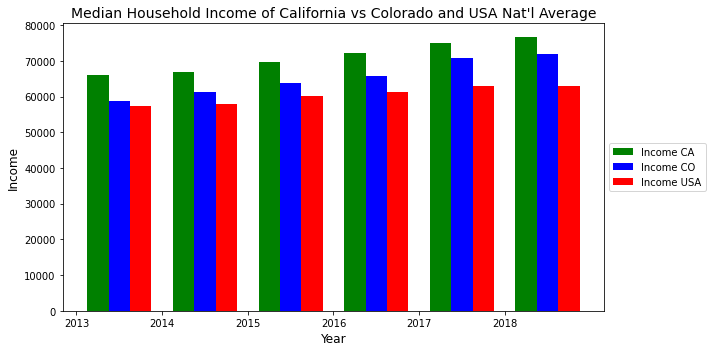

In [85]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_CO = [58823, 61303, 63909, 65685, 70676, 71953]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.25

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_CO, width, color = "blue", label = "Income CO")
fig3 = ax.bar(x_axis + (3 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Median Household Income of California vs Colorado and USA Nat'l Average",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_CO.png")
plt.show()


A closer look at California income versus Colorado and the US national average.

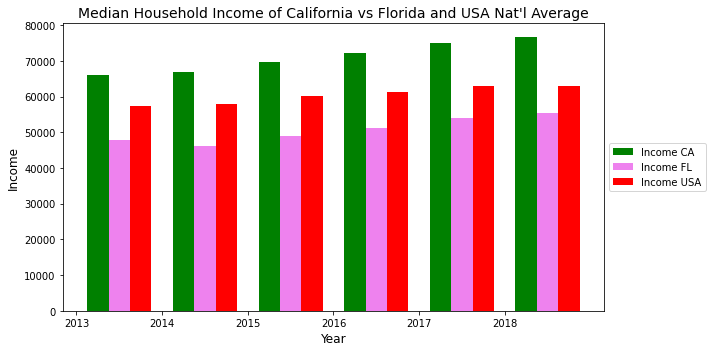

In [86]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_FL = [47886, 46140, 48825, 51176, 53945, 55462]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.25

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_FL, width, color = "violet", label = "Income FL")
fig3 = ax.bar(x_axis + (3 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Median Household Income of California vs Florida and USA Nat'l Average",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_FL.png")
plt.show()


A closer look at California income versus Florida and the national average.

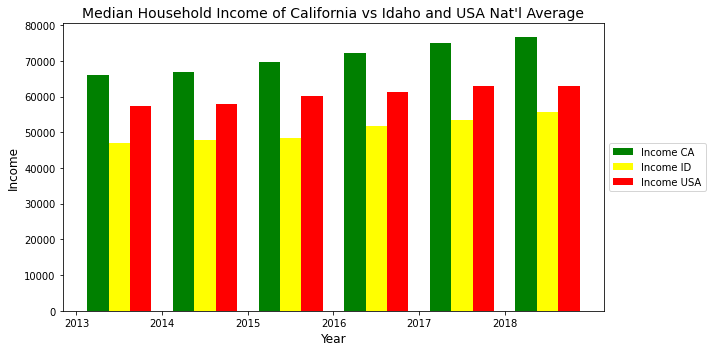

In [87]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_ID = [46873, 47861, 48275, 51807, 53392, 55583]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.25

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_ID, width, color = "yellow", label = "Income ID")
fig3 = ax.bar(x_axis + (3 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Median Household Income of California vs Idaho and USA Nat'l Average",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_ID.png")
plt.show()


A closer look at California income versus Idaho and the US national average. 

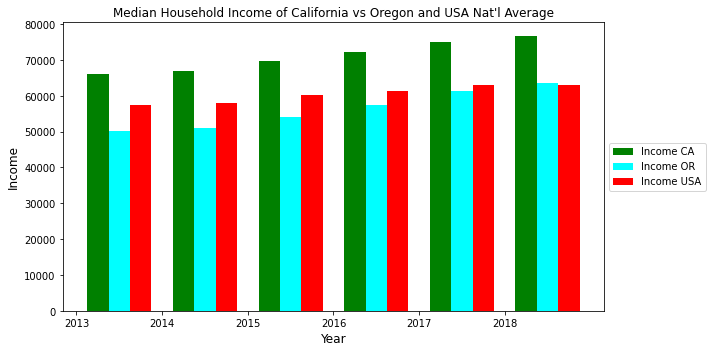

In [88]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_OR = [50251,51075, 54148, 57532, 61369, 63426]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.25

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_OR, width, color = "cyan", label = "Income OR")
fig3 = ax.bar(x_axis + (3 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Median Household Income of California vs Oregon and USA Nat'l Average",fontsize=(12))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_OR.png")
plt.show()


A closer look at California income versus Oregon and the US national average.

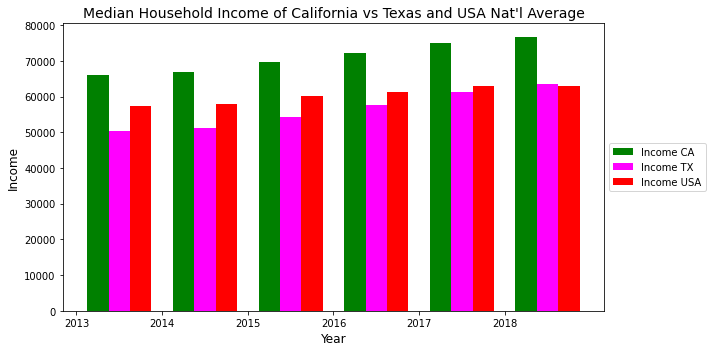

In [89]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Income_CA = [66159, 66947, 69603, 72167, 74888, 76641]
Income_TX = [51704, 53035, 55653, 56565, 60416, 60629]
Income_USA = [57437, 58001, 60187, 61383, 62927, 63059]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.25

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), Income_CA, width, color = "green", label = "Income CA")
fig2 = ax.bar(x_axis + (2 * width), Income_OR, width, color = "magenta", label = "Income TX")
fig3 = ax.bar(x_axis + (3 * width), Income_USA, width, color = "red", label = "Income USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Income",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Median Household Income of California vs Texas and USA Nat'l Average",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("Images/HHIncomeCA_TX.png")
plt.show()


A closer look at California income versus Texas and the US national average.

In [90]:
#Create a data set for the ACS Gini Co-efficient
# CA,CO,FL,ID,OR,TX ACS Gini Co-efficient Data Frame from Census Data
gini_df = pd.DataFrame({
    "Year":["2013", "2014", "2015", "2016", "2017", "2018"],
    "CA":[.490, .489, .488, .490, .487, .491],
    "CO":[.461, .458, .458, .459, .455, .456],
    "FL":[.484, .483, .487, .485, .486, .489],
    "ID":[.438, .454, .453, .450, .448, .445],
    "OR":[.460, .462, .462, .458, .459, .458],
    "TX":[.481, .483, .482, .480, .478, .482],
    "USA":[.481, .480, .482, .482, .482, .485],})

# To format the columns
gini_df["CA"] = gini_df["CA"].map("{:,}".format)
gini_df["CO"] = gini_df["CO"].map("{:,}".format)
gini_df["FL"] = gini_df["FL"].map("{:,}".format)
gini_df["ID"] = gini_df["ID"].map("{:,}".format)
gini_df["OR"] = gini_df["OR"].map("{:,}".format)
gini_df["TX"] = gini_df["TX"].map("{:,}".format)
gini_df["USA"] = gini_df["USA"].map("{:,}".format)
gini_df


,Year,CA,CO,FL,ID,OR,TX,USA
0,2013,0.49,0.461,0.484,0.438,0.46,0.481,0.481
1,2014,0.489,0.458,0.483,0.454,0.462,0.483,0.48
2,2015,0.488,0.458,0.487,0.453,0.462,0.482,0.482
3,2016,0.49,0.459,0.485,0.45,0.458,0.48,0.482
4,2017,0.487,0.455,0.486,0.448,0.459,0.478,0.482
5,2018,0.491,0.456,0.489,0.445,0.458,0.482,0.485


The ACS Gini Co-Efficient represents the income inequality. 
Zero (0) represents perfect equality.
One (1) represents perfect inequality.
The USA average stands stable with subtle increases standing at around .485.
California stands above the national index over time showing income inequality.
The competing 5 states show to be at or below USA national index so income is more equal.

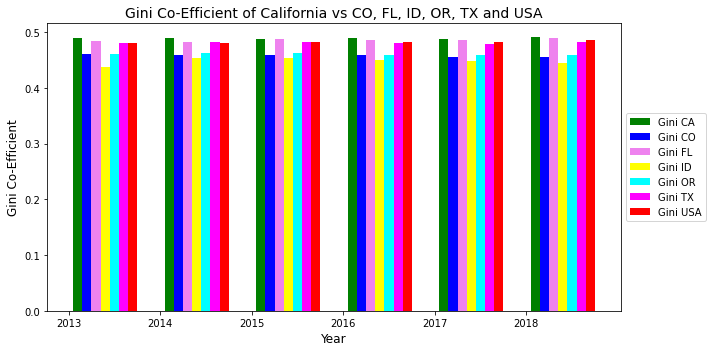

In [91]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
gini_CA = [.490, .489, .488, .490, .487, .491]
gini_CO = [.461, .458, .458, .459, .455, .456]
gini_FL = [.484, .483, .487, .485, .486, .489]
gini_ID = [.438, .454, .453, .450, .448, .445]
gini_OR = [.460, .462, .462, .458, .459, .458]
gini_TX = [.481, .483, .482, .480, .478, .482]
gini_USA = [.481, .480, .482, .482, .482, .485]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.10

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), gini_CA, width, color = "green", label = "Gini CA")
fig2 = ax.bar(x_axis + (2 * width), gini_CO, width, color = "blue", label = "Gini CO")
fig3 = ax.bar(x_axis + (3 * width), gini_FL, width, color = "violet", label = "Gini FL")
fig4 = ax.bar(x_axis + (4 * width), gini_ID, width, color = "yellow", label = "Gini ID")
fig5 = ax.bar(x_axis + (5 * width), gini_OR, width, color = "cyan", label = "Gini OR")
fig6 = ax.bar(x_axis + (6 * width), gini_TX, width, color = "magenta", label = "Gini TX")
fig7 = ax.bar(x_axis + (7 * width), gini_USA, width, color = "red", label = "Gini USA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Gini Co-Efficient",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("Gini Co-Efficient of California vs CO, FL, ID, OR, TX and USA",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig("images/Gini_CoSummary.png")
plt.show()

The ACS Gini Co-efficient shows the income inequality of California as compared to the 5 competing states and USA ACS average
conclusion: while CA offers higher incomes, the income inequality outweighs the benefits of higher income.

In [92]:
#Data set for state tax rates set by US Tax Foundation
## CA,CO,FL,ID,OR,TX ACS Gini Co-efficient Data Frame from Census Data
tax_df = pd.DataFrame({
    "Year":["2013", "2014", "2015", "2016", "2017", "2018"],
    "CA":[8.38, 8.41, 8.44, 8.48, 8.25, 8.54],
    "CO":[7.39, 7.39, 7.44, 7.52, 7.52, 7.52],
    "FL":[6.62, 6.62, 6.65, 6.66, 6.8, 6.8],
    "ID":[6.02, 6.03, 6.03, 6.03, 6.03, 6.03],
    "OR":[0, 0, 0, 0, 0, 0],
    "TX":[8.14, 8.15, 8.05, 8.07, 8.19, 8.19]})

# To format the columns
tax_df["CA"] = tax_df["CA"].map("{:,}".format)
tax_df["CO"] = tax_df["CO"].map("{:,}".format)
tax_df["FL"] = tax_df["FL"].map("{:,}".format)
tax_df["ID"] = tax_df["ID"].map("{:,}".format)
tax_df["OR"] = tax_df["OR"].map("{:,}".format)
tax_df["TX"] = tax_df["TX"].map("{:,}".format)
tax_df

,Year,CA,CO,FL,ID,OR,TX
0,2013,8.38,7.39,6.62,6.02,0,8.14
1,2014,8.41,7.39,6.62,6.03,0,8.15
2,2015,8.44,7.44,6.65,6.03,0,8.05
3,2016,8.48,7.52,6.66,6.03,0,8.07
4,2017,8.25,7.52,6.8,6.03,0,8.19
5,2018,8.54,7.52,6.8,6.03,0,8.19


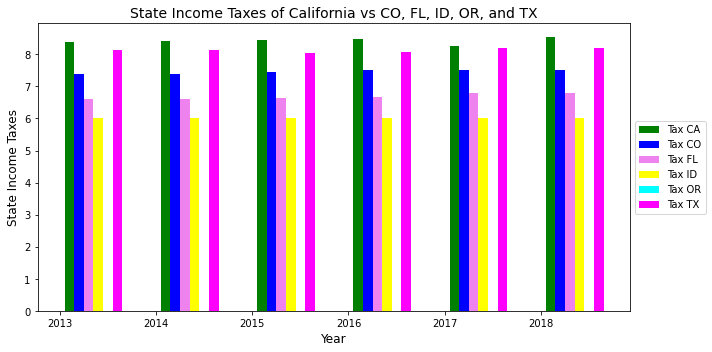

In [93]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
tax_CA = [8.38, 8.41, 8.44, 8.48, 8.25, 8.54]
tax_CO = [7.39, 7.39, 7.44, 7.52, 7.52, 7.52]
tax_FL = [6.62, 6.62, 6.65, 6.66, 6.8, 6.8]
tax_ID = [6.02, 6.03, 6.03, 6.03, 6.03, 6.03]
tax_OR = [0, 0, 0, 0, 0, 0]
tax_TX = [8.14, 8.15, 8.05, 8.07, 8.19, 8.19]


# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.10

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,5))
fig1 = ax.bar(x_axis + (width), tax_CA, width, color = "green", label = "Tax CA")
fig2 = ax.bar(x_axis + (2 * width), tax_CO, width, color = "blue", label = "Tax CO")
fig3 = ax.bar(x_axis + (3 * width), tax_FL, width, color = "violet", label = "Tax FL")
fig4 = ax.bar(x_axis + (4 * width), tax_ID, width, color = "yellow", label = "Tax ID")
fig5 = ax.bar(x_axis + (5 * width), tax_OR, width, color = "cyan", label = "Tax OR")
fig6 = ax.bar(x_axis + (6 * width), tax_TX, width, color = "magenta", label = "Tax TX")


# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("State Income Taxes",fontsize=(12))
ax.set_xlabel("Year",fontsize=(12))
ax.set_title("State Income Taxes of California vs CO, FL, ID, OR, and TX",fontsize=(14))
ax.set_xticks(x_axis)
ax.set_xticklabels(income_df["Year"])

# Set our legend to where the chart thinks is best
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

#ax.legend()
fig.tight_layout()
plt.savefig("Images/StateTaxSummary.png")
plt.show()

This chart clearly shows that California has the highest rate of taxation compared to the 5 competing states.
This is another proof point that while CA has higher incomes, Californian's are taxes much higher and further proves income inequality.

## Part-IV: Housing and Renting in 6 states (Natalia)

### Renting

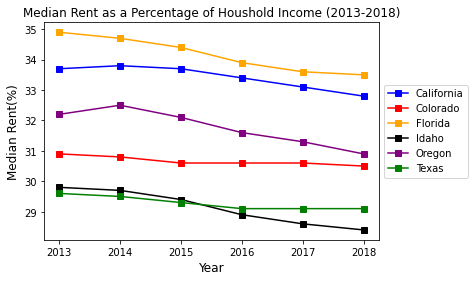

In [46]:
#Rent
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Rent(%)"]
y_axis_co = colorado_all_years["Rent(%)"]
y_axis_fl = florida_all_years["Rent(%)"]
y_axis_id = idaho_all_years["Rent(%)"]
y_axis_or = oregon_all_years["Rent(%)"]
y_axis_tx = texas_all_years["Rent(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Rent as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('Median Rent(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Rent_as_Percentage_of_Houshold_Income.png",bbox_inches='tight')

plt.show()

Both CA and FL have higer Rent. The cheapest state to rent id Idaho.

### Median owner cost for a house with Mortgage as percentage of houshold income 

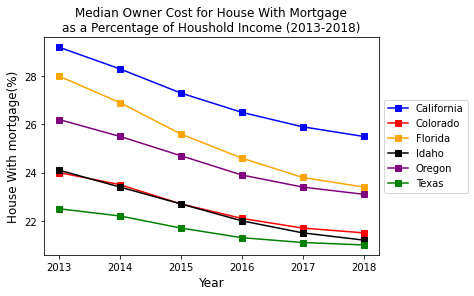

In [94]:
#Owner cost (House with Mortgage)

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House with mortgage(%)"]
y_axis_co = colorado_all_years["House with mortgage(%)"]
y_axis_fl = florida_all_years["House with mortgage(%)"]
y_axis_id = idaho_all_years["House with mortgage(%)"]
y_axis_or = oregon_all_years["House with mortgage(%)"]
y_axis_tx = texas_all_years["House with mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House With Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House With mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_With_Mortgage.png",bbox_inches='tight')

plt.show()

All considered states can be separated by three main groups: California the most expensive statae to buy a house with mortgage.
The less expecive is CO, ID and TX, and became very close to each other in 2018. Fl and OR are between. 

### Median owner cost for a house without Mortgage as percentage of houshold income

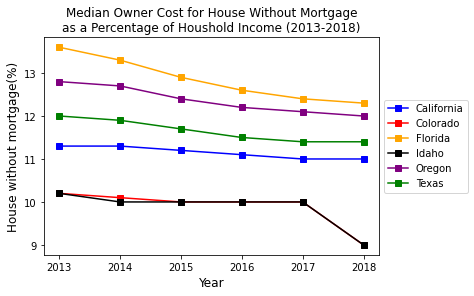

In [95]:
#Owner cost (House without Mortgage)
x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["House without mortgage(%)"]
y_axis_co = colorado_all_years["House without mortgage(%)"]
y_axis_fl = florida_all_years["House without mortgage(%)"]
y_axis_id = idaho_all_years["House without mortgage(%)"]
y_axis_or = oregon_all_years["House without mortgage(%)"]
y_axis_tx = texas_all_years["House without mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

plt.title('Median Owner Cost for House Without Mortgage\n'+'as a Percentage of Houshold Income (2013-2018)',fontsize=(12))
plt.ylabel('House without mortgage(%)',fontsize=(12))
plt.xlabel('Year',fontsize=(12))

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

# Save the plotted figure as .pngs
plt.savefig("Images/Median_Owner_Cost_for_House_Without_Mortgage.png",bbox_inches='tight')

plt.show()

Conclusion #3: Situation is changed significantly if we consider the Owner Costs for the House without Mortgage.
In this case, Fl and Oregon are the most expecive states.
The most attractive states to have property is ID and CO.

## Part-V: Population, Migration, Poverty Rate (Jenifer)

In [38]:
# Filter to California only
California = all_census_data.loc[all_census_data["State Name"]=="California"]
California

,Year,State Name,State Number,Population,Move In,Move Out,Delta,Per Capita Income,Poverty Count,Poverty Rate,...,House with mortgage(%),House without mortgage(%),Mean of Trans by Age,Travel Time to Work,Race Total,White alone,Block or African American alone,American Indian and Alaska Native Alone,Asian Alone,Unemployement count
0,2013,California,06,37659181.0,485477.0,581679.0,-96202.0,29527.0,5885417.0,15.628107,...,29.2,11.3,16290887.0,15437979.0,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,2168665.0
6,2014,California,06,38066920.0,513968.0,593308.0,-79340.0,29906.0,6115244.0,16.064457,...,28.3,11.3,16529777.0,15658667.0,38066920.0,23650913.0,2262323.0,287360.0,5130536.0,2084564.0
12,2015,California,06,38421464.0,514477.0,643710.0,-129233.0,30318.0,6135142.0,15.968007,...,27.3,11.2,16869052.0,15968724.0,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,1891081.0
18,2016,California,06,38654206.0,514758.0,657690.0,-142932.0,31458.0,6004257.0,15.533257,...,26.5,11.1,17193695.0,16259259.0,38654206.0,23680584.0,2261835.0,285512.0,5354608.0,1683726.0
24,2017,California,06,38982847.0,523131.0,661026.0,-137895.0,33128.0,5773408.0,14.810124,...,25.9,11.0,17589758.0,16611711.0,38982847.0,23607242.0,2263222.0,292018.0,5503672.0,1491146.0
30,2018,California,06,39148760.0,501023.0,691145.0,-190122.0,35021.0,5487141.0,14.016130,...,25.5,11.0,17904213.0,16883403.0,39148760.0,23529068.0,2267875.0,296475.0,5604339.0,1321502.0


# Population in CA 2013-2018

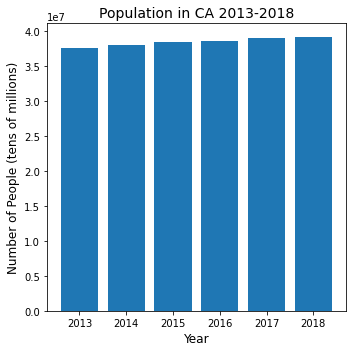

In [39]:
# assign x tick values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size
plt.figure(figsize=(5,5))

# create bar graph for population in CA
plt.bar(x_axis, California["Population"])

# Set x-axis label, y-axis label, title, and legend for the bar graph
plt.xticks(tick_locations, California["Year"])
plt.title("Population in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of People (tens of millions)",fontsize=12)


# Save as png file 
plt.savefig("Images/CAPopulation.png")

# Show fig
plt.tight_layout()
plt.show()

 - Over the years, population has been increasing.

# Migration In and Out of CA 2013-2018

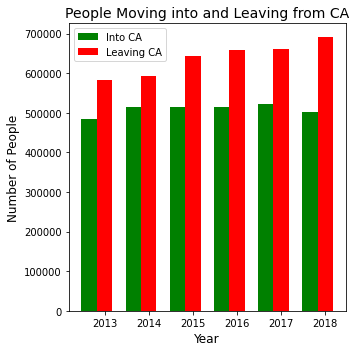

In [26]:
# Set the label and width for the bar chart
width = 0.35
bars1 = California["Move In"]
bars2 = California["Move Out"]

# Assign height and width of bars
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# Create bar graph 
fig, ax = plt.subplots(figsize=(5,5))
fig1 = ax.bar(r1, bars1, width, color = "green", label = "Into CA")
fig2 = ax.bar(r2, bars2, width, color = "red", label = "Leaving CA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Number of People",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.set_title("People Moving into and Leaving from CA",fontsize=14)
plt.xticks([r + width for r in range(len(bars1))], ['2013', '2014', '2015', '2016', '2017', '2018'])
ax.legend()

# Save as png file 
plt.savefig("Images/CAMigration.png")

# Show fig
fig.tight_layout()
plt.show()

- Even though, population in the overall state has been increasing, more people over the years have been moving out of CA.

# Per Capita Income 

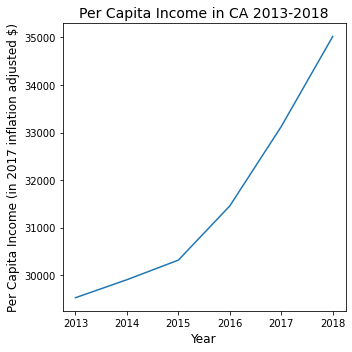

In [27]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set fig size 
plt.figure(figsize=(5,5))

# plot line graph
plt.plot(x_axis, California["Per Capita Income"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Per Capita Income in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)",fontsize=12)

# Save as png file 
plt.savefig("Images/PerCapitaIncome.png")

# show fig
plt.tight_layout()
plt.show()

- Per Capita Income is used to evaluate the standard of living and qualify of life. It is calculated by Income divided by Population. Even though the Per Capita Income is increasing it does not neccessarily mean that the standard of living is increasing as well. The Per Capita Income does not take into account inflation changes over the years. The Census calculated these numbers using the 2017 inflation adjusted numbers.

# Poverty Rate

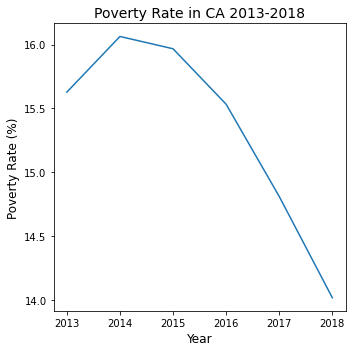

In [29]:
# assign tick locations for x values 
x_axis = np.arange(len(California))
tick_locations = [value for value in x_axis]

# set figure size 
plt.figure(figsize=(5,5))

# plot line graph
plt.plot(x_axis, California["Poverty Rate"])

# Set x-axis label, y-axis label, and title for the line graph
plt.xticks(tick_locations, California["Year"])
plt.title("Poverty Rate in CA 2013-2018",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Poverty Rate (%)",fontsize=12)

# Save as png file 
plt.savefig("Images/PovertyRate.png")

# show fig
plt.tight_layout()
plt.show()

- Poverty Rate has been decreasing over the years but it could be indicator of change in inflation. 

# Per Capita Income vs Poverty Rate

The r-squared is: 0.9103035368503318
The p-value is: 0.0031120944920132745


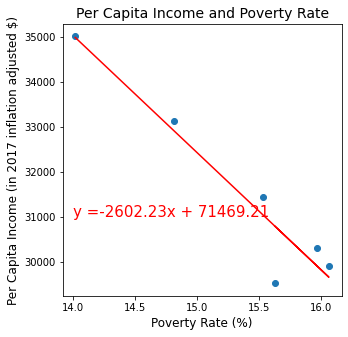

In [32]:
# set figure size 
plt.figure(figsize=(5,5))

# assign x and y values 
x_values = California["Poverty Rate"]
y_values = California["Per Capita Income"]

# calculate regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) +"x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# add annotation, title, and labels for the scatter plot
plt.annotate(line_eq, (14,31000), fontsize= 15, color="red")
plt.title("Per Capita Income and Poverty Rate",fontsize=14)
plt.ylabel("Per Capita Income (in 2017 inflation adjusted $)",fontsize=12)
plt.xlabel("Poverty Rate (%)",fontsize=12)

# print r-squared and p-value 
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Save as png file 
plt.savefig("Images/PerCapitaPoverty.png")

# Show fig 
plt.show()

- Per Capita Income and Poverty Rate are negatively strongly correlated and significant. This is shown from the r-squared value which is .91 and the p-value that is less than .05. 

In [ ]:
## Part-II: Jenifer